# WALMART DATA ANALYSIS

## TASK - 
### Analyse the Walmart sales with given data

### https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# Load data
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('stores.csv')

### VIEWING DATA

In [44]:
# Training data
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [46]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [47]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [48]:
# Test data
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [49]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [50]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [51]:
# Features on which sales depend
features_df.head()

# Key-
# CPI - Consumer Price Index
# Markdown - Permanent price decrease in goods = Highest current bid - lower price charged by dealer to customer

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [52]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [53]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [54]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [55]:
# Stores data
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [56]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

### DATA CLEANING AND ORGANISATION

In [57]:
# New DataFrame formed by merging 'Stores' and 'Features' DataFrame

feature_store=features_df.merge(stores_df,how='inner',on='Store')
# Inner join - common column is 'Store'

In [58]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [59]:
feature_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [60]:
# Converting date to datetime format
from datetime import datetime

In [61]:
feature_store['Date']=pd.to_datetime(feature_store['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'])
test_df['Date']=pd.to_datetime(test_df['Date'])

In [62]:
# Making new columns for week and year
# isocalendar is python's calendar 

feature_store['Week']=dataset_m.Date.dt.isocalendar().week
feature_store['Year']=dataset_m.Date.dt.isocalendar().year
feature_store.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


In [63]:
# New DataFrame by merging 'Train' and 'Feature_Store' DataFrame on Store, Date and isHoliday
# Inner join
# sort the values by Store, Department and Date 

In [64]:
# NOTE - In left and Right join, order of DataFrames matter
# Syntax - base_table.merge(matching_values_table)

data=train_df.merge(feature_store,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


## DATA VISUALISATION

### SCATTER PLOT

In [65]:
# Function to make scatter plots
def scatter(data,column):
    plt.figure(figsize=(10,10))
    # Plot the DataFrame - specified column in x axis and 'Weekly_Sales' in y axis
    plt.scatter(train_df[column],data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

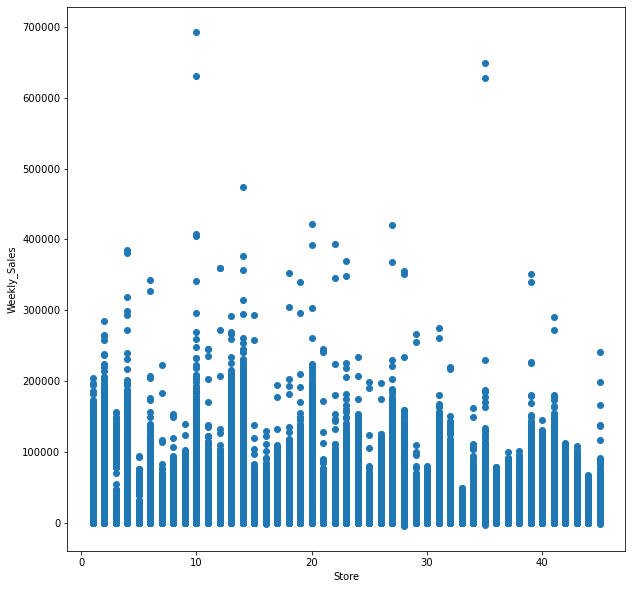

In [66]:
# 'Weekly_Sales' v/s 'Store'
scatter(train_df_1,'Store')

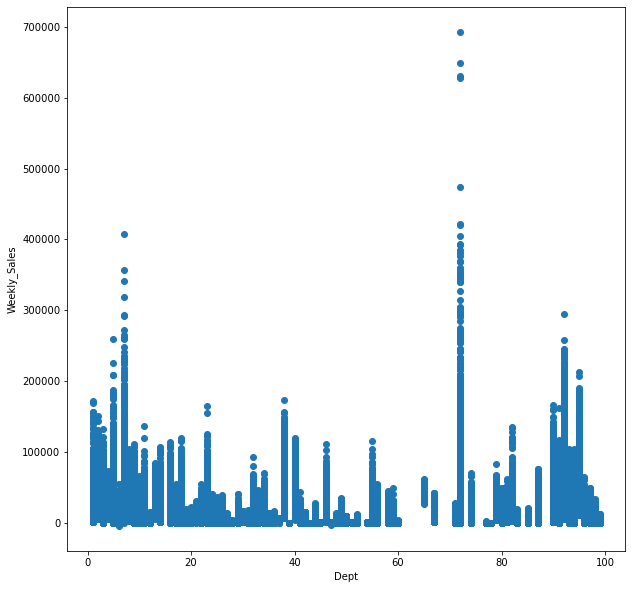

In [67]:
# 'Weekly_Sales' v/s 'Department'
scatter(train_df_1,'Dept')

### LINE PLOT

In [68]:
# Year 2010

# Filtering out mean 'Weekly_Sales' per 'Week'
weekly_sales_2010=data[data['Year']==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2010.head()

Week
5    16836.121997
6    16352.056032
7    16216.658979
8    14899.549688
9    15921.015727
Name: Weekly_Sales, dtype: float64

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Week'>

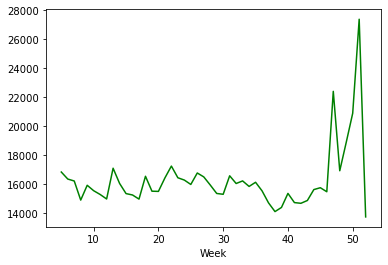

In [69]:
# 'Week' on x axis and 'mean_weekly_sales' for that week on y axis 
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='green')
# index is week number
# values is the mean_weekly_sales for that week

In [70]:
# Year 2011

# Filtering out mean 'Weekly_Sales' per 'Week'
weekly_sales_2011=data[data['Year']==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011.head()

Week
1    14599.244973
2    13891.283484
3    13932.367385
4    13566.239462
5    15773.448776
Name: Weekly_Sales, dtype: float64

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Week'>

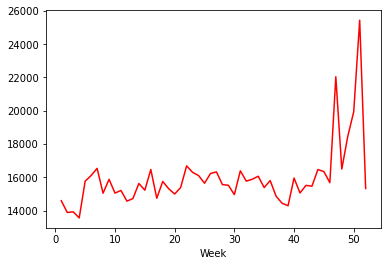

In [71]:
# 'Week' on x axis and 'mean_weekly_sales' for that week on y axis 
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')
# index is week number
# values is the mean_weekly_sales for that week

In [72]:
# Year 2012

# Filtering out mean 'Weekly_Sales' per 'Week'
weekly_sales_2012=data[data['Year']==2012]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012.head()

Week
1    15121.231736
2    14168.266514
3    14221.357405
4    13494.232612
5    15480.553608
Name: Weekly_Sales, dtype: float64

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Week'>

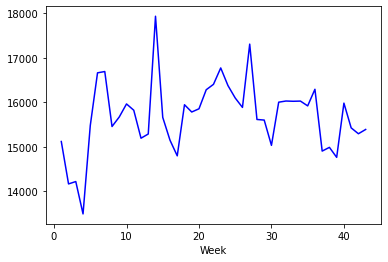

In [73]:
# 'Week' on x axis and 'mean_weekly_sales' for that week on y axis 
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='blue')
# index is week number
# values is the mean_weekly_sales for that week

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


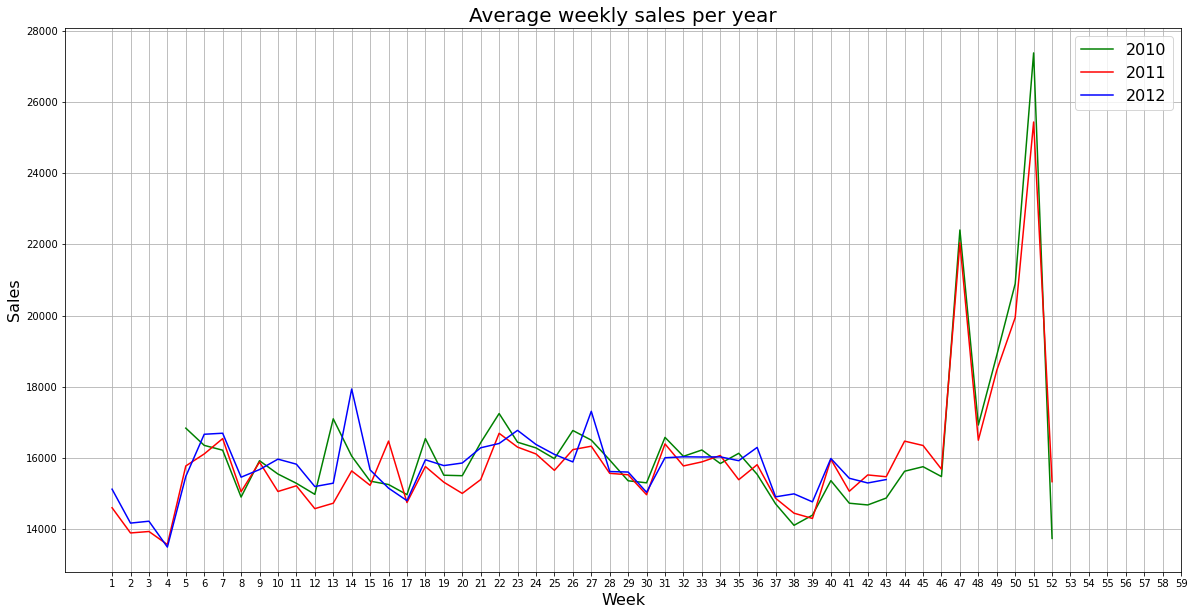

In [74]:
# Combined line plot of years 2010, 2011, 2012

plt.figure(figsize=(20,10))

plt.grid() # Grid 
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='green')
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='blue')

# Labels and Legends
plt.xticks(np.arange(1,60,step=1))
plt.title("Average weekly sales per year",fontsize=20)
plt.xlabel('Week',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.legend(['2010','2011','2012'],fontsize=16)
plt.show()

### HISTOGRAM

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

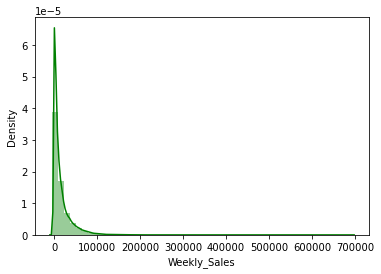

In [75]:
# log normal skewed - positive skew graph
sns.distplot(data['Weekly_Sales'],color='green')

In [76]:
# kurtosis - is a measure of whether the data is heavy tailed or light tailed relative to normal distribution
# heavy tails - many outliers - high value of kurtosis
# light tail - less outliers

data['Weekly_Sales'].kurt()

21.49128990832619

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

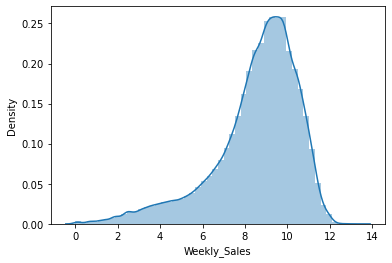

In [77]:
# Histogram of 'Sales greater than zero'
train_sales=data[data['Weekly_Sales']>0]

# Take normal log of data of 'Sales greater than zero'
# Reduce scale and visualise skewness of graph
sales_greater_than_zero=np.log1p(train_sales['Weekly_Sales'])
sns.distplot(sales_greater_than_zero)

### BARCHART ON DATAFRAME

In [78]:
# Average 'Weekly_Sales' per 'Store'
weekly_sales_store=data['Weekly_Sales'].groupby(data['Store']).mean()
weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [79]:
# Convert to DataFrame
weekly_sales_store_df=pd.DataFrame(weekly_sales_store)

# Sort 'Weekly_Sales' in descending order and plot Bar chart
weekly_sales_store_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=98,color='#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per store')

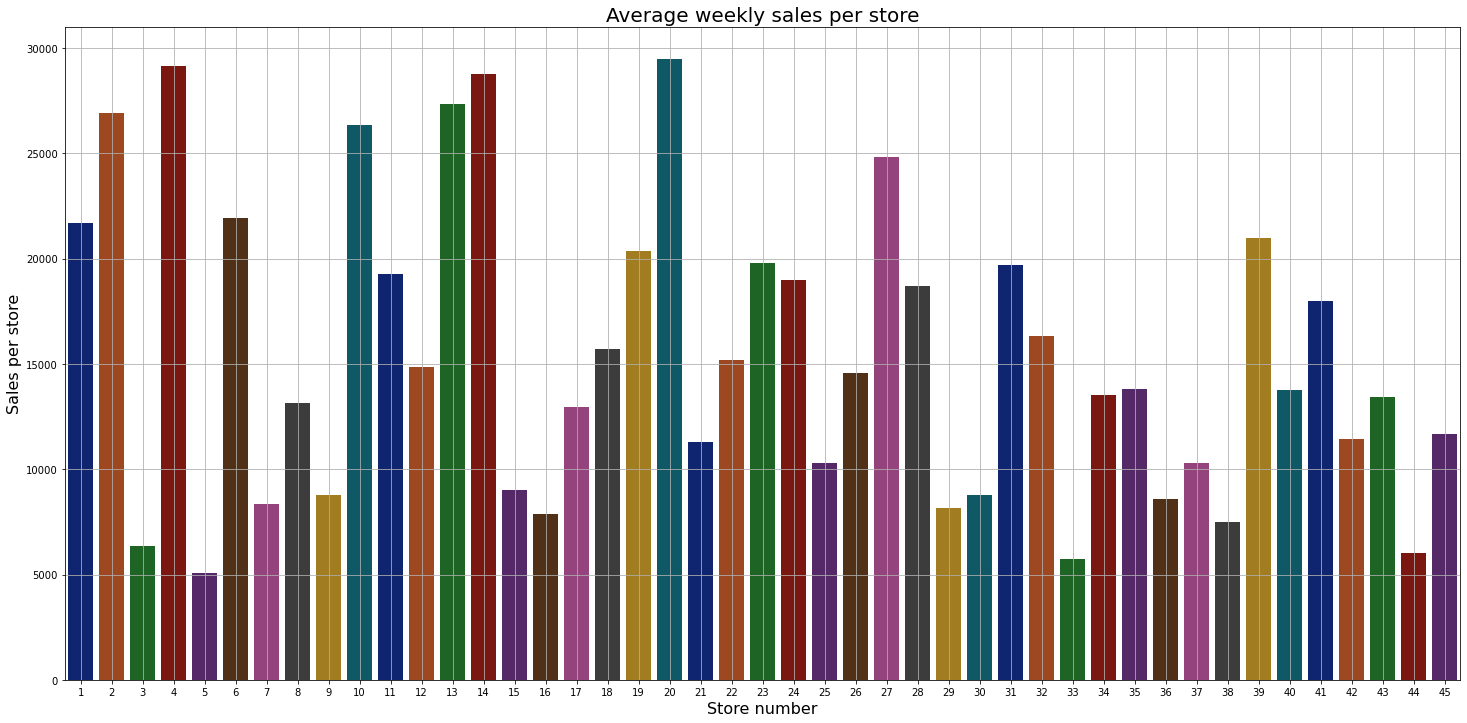

In [80]:
# Plotting Bar chart with 'Store' on x axis and mean 'Weekly_Sales' on y axis for that store

plt.figure(figsize=(25,12))

sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette='dark')
plt.grid()
plt.title("Average weekly sales per store",fontsize=20)
plt.xlabel('Store number',fontsize=16)
plt.ylabel("Sales per store",fontsize=16)

In [81]:
# Average 'Weekly_Sales' per 'Department'
weekly_sales_dept=data['Weekly_Sales'].groupby(data['Dept']).mean()
weekly_sales_dept.head()

Dept
1    19213.485088
2    43607.020113
3    11793.698516
4    25974.630238
5    21365.583515
Name: Weekly_Sales, dtype: float64

In [82]:
# Convert to DataFrame
weekly_sales_dept_df=pd.DataFrame(weekly_sales_dept)

# Sort 'Weekly_Sales' in descending order and plot Bar chart
weekly_sales_dept_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=98)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per store')

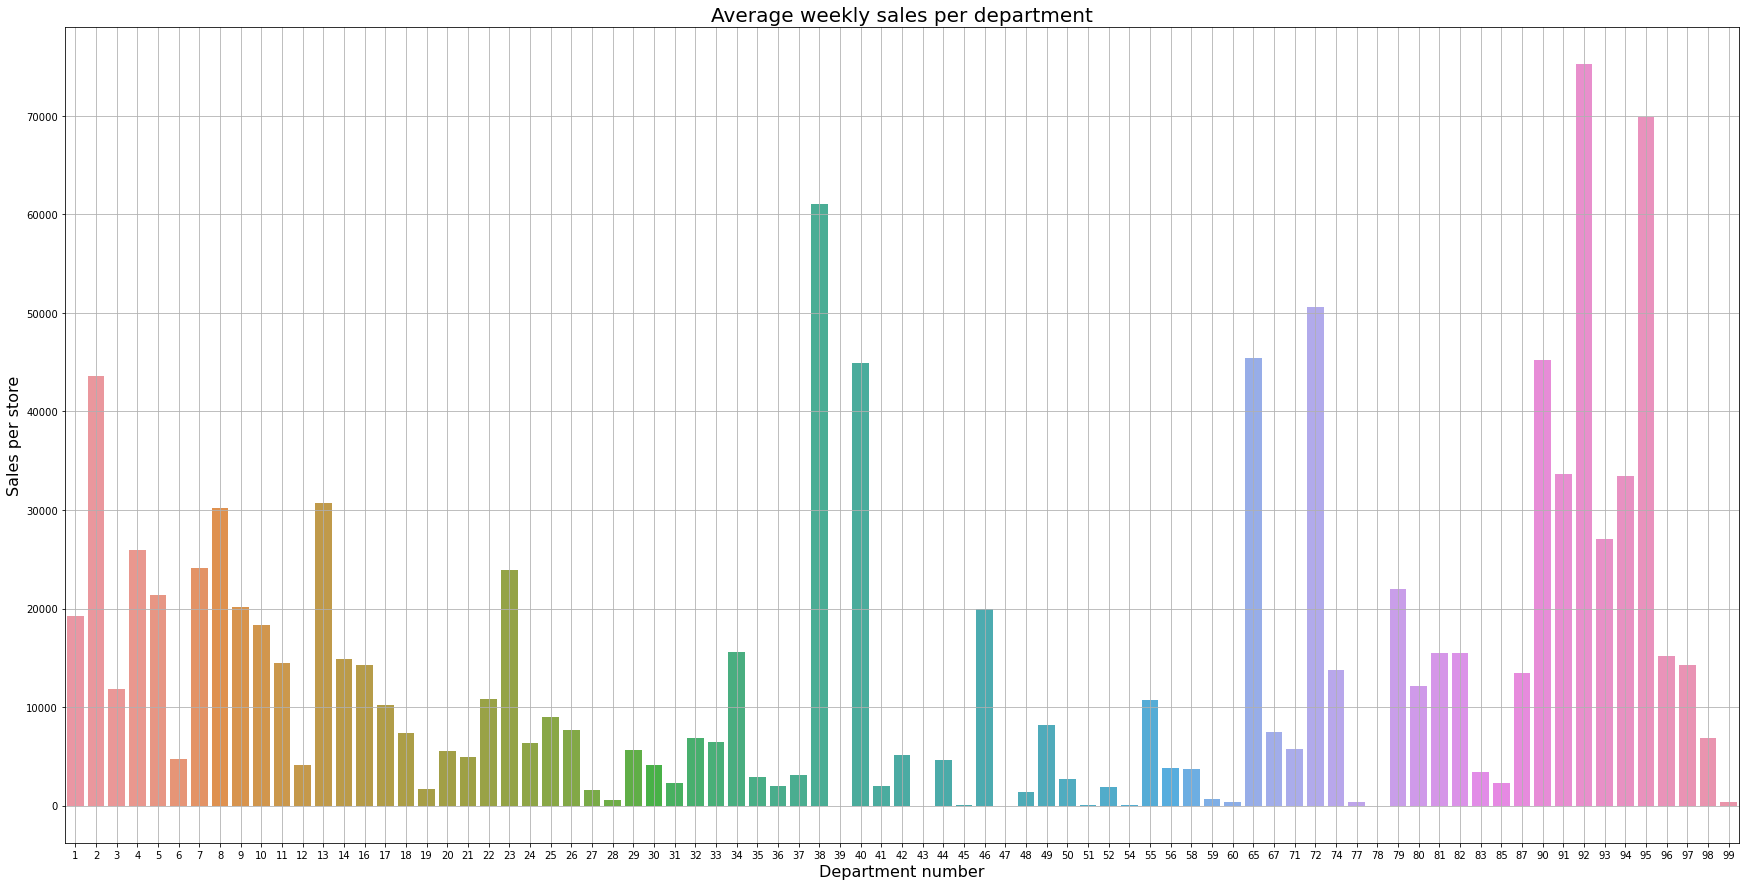

In [83]:
# Plotting Bar chart with 'Store' on x axis and mean 'Weekly_Sales' on y axis for that store

plt.figure(figsize=(30,15))

sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values)
plt.grid()
plt.title("Average weekly sales per department",fontsize=20)
plt.xlabel('Department number',fontsize=16)
plt.ylabel("Sales per store",fontsize=16)

### HEATMAP

<AxesSubplot:>

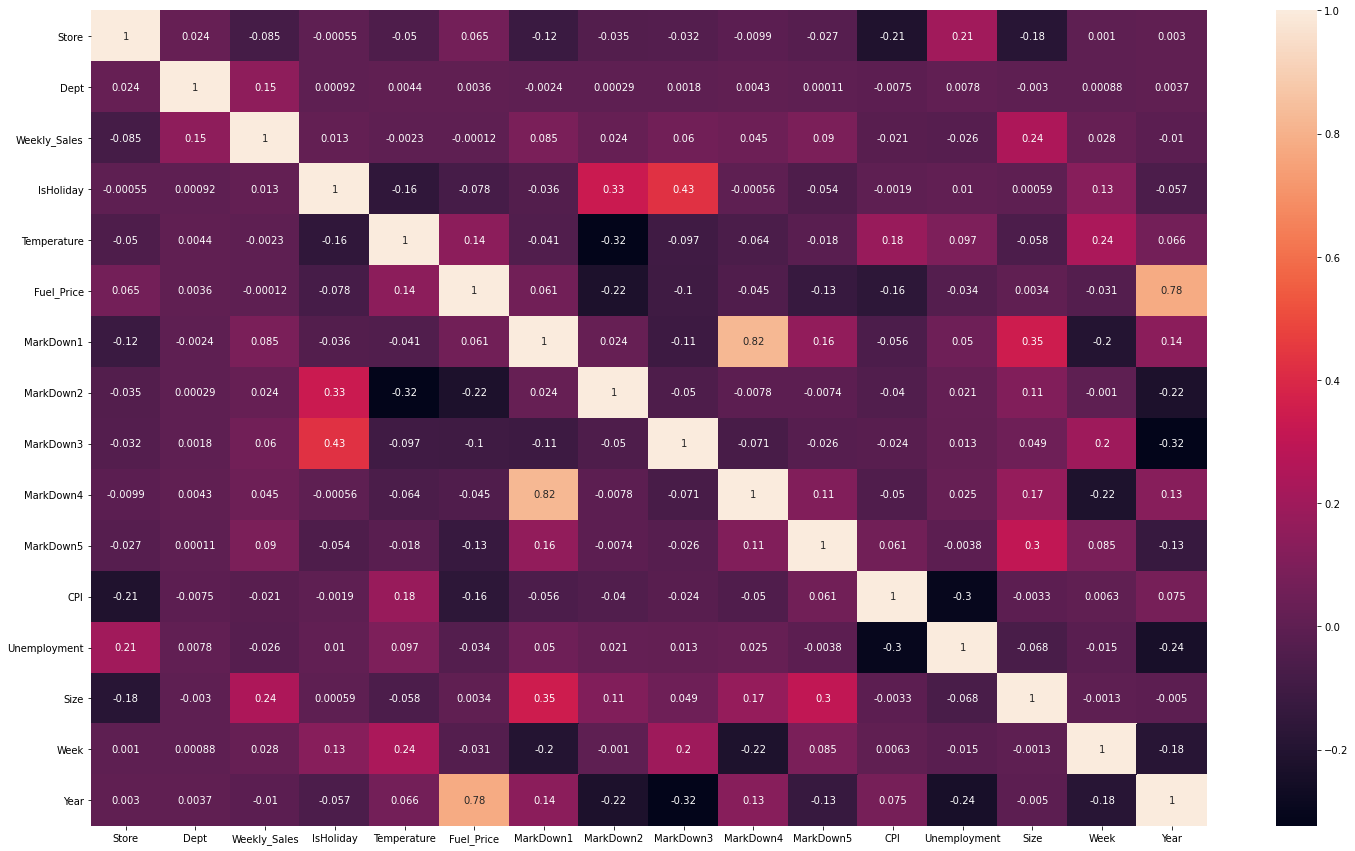

In [84]:
# Correlation between features
plt.figure(figsize=(25,15))

sns.heatmap(train_df_1.corr(),annot=True)

## CONCLUSION

### 1. Max sales were achieved in the year of 2010
### 2. Mean weekly sales is highest in the stores numbered 4, 14 and 20
### 3. Mean weekly sales is highest in the department numbered 92
### 4. Weekly sales has significant correlation with size of the store